In [224]:
import numpy as np
import os
import cv2
import pandas as pd
import random

import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization,Conv2D, MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential, Model,load_model,model_from_json
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [84]:
TRAIN_PATH = './Dataset/ds_resize_gray/train/'
VAL_PATH = './Dataset/ds_resize_gray/val/'

HEIGHT = 256
WIDTH = 256
BATCH_SIZE = 50

In [179]:
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

classes_dict = {'c0' : 'safe driving',
           'c1' : 'texting - right',
           'c2' : 'talking on the phone - right',
           'c3' : 'texting - left',
           'c4' : 'talking on the phone - left',
           'c5' : 'operating the radio',
           'c6' : 'drinking',
           'c7' : 'reaching behind',
           'c8' : 'hair and makeup',
           'c9' : 'talking to passenger'}

In [86]:
checkpoint_filepath = "./check_points/"
if os.path.isdir(checkpoint_filepath) is not True:
    print("Folder for Checkpoints doen't exists")
    os.mkdir(checkpoint_filepath)
    
if os.path.isdir(checkpoint_filepath) is True:
    print("Folder of Checkpoints exists")

Folder of Checkpoints exists


In [87]:
checkpoint = ModelCheckpoint(checkpoint_filepath + '/{epoch:03d}-{val_accuracy:.4f}.hdf5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

In [88]:
model = Sequential()

In [89]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(HEIGHT,WIDTH,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),activation = "relu"))
model.add(MaxPooling2D())

model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation = 'softmax'))

In [90]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 64)       

In [91]:
image_data_generator = ImageDataGenerator(rotation_range=40,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True)

valimage_data_generator = ImageDataGenerator(rotation_range=40,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True)


In [95]:
train_generator = image_data_generator.flow_from_directory(TRAIN_PATH,
                                         target_size=(HEIGHT,WIDTH),
                                        batch_size=BATCH_SIZE,
                                        )


val_generator = image_data_generator.flow_from_directory(VAL_PATH,
                                         target_size=(HEIGHT,WIDTH),
                                        batch_size=BATCH_SIZE,
                                        )

Found 17941 images belonging to 10 classes.
Found 4483 images belonging to 10 classes.


In [120]:
model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.fit_generator(train_generator,
          epochs=EPOCHS,validation_data=val_generator,
          callbacks=[checkpoint]
         )

In [98]:
model_json = model.to_json()
with open("./Saved Model/Driver_distraction_model.json",'w') as json_file:
    json_file.write(model_json)

model.save_weights("./Saved Model/Driver_distraction_weights.h5")

In [111]:
from tensorflow.keras.models import model_from_json

In [112]:
with open("./Saved Model/Driver_distraction_model.json",'r') as json_file:
    model_json = json_file.read()

In [114]:
model = model_from_json(model_json)

In [115]:
model.load_weights("./Saved Model/Driver_distraction_weights.h5")

In [117]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 64)       

In [121]:
model.evaluate(train_generator)

  ...
    to  
  ['...']
359/359 [==============================] - 292s 814ms/step - loss: 0.1744 - accuracy: 0.9446


[0.17442133294257614, 0.9445962]

Due to keyboard misstype, model stopped training and could not able to store the history of entrire model. so saved the model where it is left and loaded again and finally started training from there

In [124]:
model.evaluate(val_generator)

  ...
    to  
  ['...']
90/90 [==============================] - 73s 807ms/step - loss: 0.2186 - accuracy: 0.9380


[0.21855776492092344, 0.937988]

In [128]:
model.fit_generator(train_generator,
          epochs=EPOCHS,validation_data=val_generator,
          callbacks=[checkpoint]
         )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 359 steps, validate for 90 steps
Epoch 1/250
358/359 [============================>.] - ETA: 1s - loss: 0.1946 - accuracy: 0.9423
Epoch 00001: val_accuracy did not improve from 0.95026
359/359 [==============================] - 764s 2s/step - loss: 0.1942 - accuracy: 0.9424 - val_loss: 0.1834 - val_accuracy: 0.9462
Epoch 2/250
358/359 [============================>.] - ETA: 1s - loss: 0.1882 - accuracy: 0.9446
Epoch 00002: val_accuracy did not improve from 0.95026
359/359 [==============================] - 740s 2s/step - loss: 0.1882 - accuracy: 0.9446 - val_loss: 0.2286 - val_accuracy: 0.9342
Epoch 3/250
358/359 [============================>.] - ETA: 1s - loss: 0.1900 - accuracy: 0.9451
Epoch 00003: val_accuracy did not improve from 0.95026
359/359 [==============================] - 680s 2s/step - loss: 0.1899 - accuracy: 0.9452 - val_loss: 0.2167 - val_accuracy: 0.9353
Epoch 4/250
358/359 [============================>.] - 

Epoch 29/250
358/359 [============================>.] - ETA: 1s - loss: 0.1710 - accuracy: 0.9485
Epoch 00029: val_accuracy did not improve from 0.95806
359/359 [==============================] - 726s 2s/step - loss: 0.1707 - accuracy: 0.9486 - val_loss: 0.2599 - val_accuracy: 0.9206
Epoch 30/250
358/359 [============================>.] - ETA: 1s - loss: 0.1717 - accuracy: 0.9495
Epoch 00030: val_accuracy did not improve from 0.95806
359/359 [==============================] - 683s 2s/step - loss: 0.1719 - accuracy: 0.9495 - val_loss: 0.1840 - val_accuracy: 0.9420
Epoch 31/250
358/359 [============================>.] - ETA: 1s - loss: 0.1680 - accuracy: 0.9484
Epoch 00031: val_accuracy did not improve from 0.95806
359/359 [==============================] - 701s 2s/step - loss: 0.1679 - accuracy: 0.9483 - val_loss: 0.1819 - val_accuracy: 0.9451
Epoch 32/250
358/359 [============================>.] - ETA: 1s - loss: 0.1761 - accuracy: 0.9462
Epoch 00032: val_accuracy did not improve from 

Epoch 58/250
358/359 [============================>.] - ETA: 1s - loss: 0.1593 - accuracy: 0.9520
Epoch 00058: val_accuracy did not improve from 0.96364
359/359 [==============================] - 755s 2s/step - loss: 0.1596 - accuracy: 0.9519 - val_loss: 0.2087 - val_accuracy: 0.9340
Epoch 59/250
358/359 [============================>.] - ETA: 1s - loss: 0.1499 - accuracy: 0.9561
Epoch 00059: val_accuracy did not improve from 0.96364
359/359 [==============================] - 756s 2s/step - loss: 0.1498 - accuracy: 0.9562 - val_loss: 0.1764 - val_accuracy: 0.9447
Epoch 60/250
358/359 [============================>.] - ETA: 1s - loss: 0.1659 - accuracy: 0.9493
Epoch 00060: val_accuracy did not improve from 0.96364
359/359 [==============================] - 759s 2s/step - loss: 0.1662 - accuracy: 0.9493 - val_loss: 0.2342 - val_accuracy: 0.9286
Epoch 61/250
358/359 [============================>.] - ETA: 1s - loss: 0.1548 - accuracy: 0.9523
Epoch 00061: val_accuracy did not improve from 

KeyError: 'val_accuracy'

In [129]:
model_json = model.to_json()
with open("./Saved Model/Driver_distraction_model.json",'w') as json_file:
    json_file.write(model_json)

model.save_weights("./Saved Model/Driver_distraction_weights.h5")

In [131]:
model.history.history

{'loss': [0.19428453792203637,
  0.188180825406121,
  0.18987666493114883,
  0.18129100520337155,
  0.18951115952139713,
  0.19047545379991282,
  0.18489701174302156,
  0.18564218023355758,
  0.18857296692530026,
  0.17763995339093244,
  0.18571158902138532,
  0.17404966604519592,
  0.18870450355125842,
  0.17919239102377985,
  0.17278657090431207,
  0.18523043255986602,
  0.17719296886636576,
  0.17816984025420643,
  0.18057216281040886,
  0.17938377849823495,
  0.16761107982487378,
  0.18160383860298698,
  0.17978436834001385,
  0.16865653848111195,
  0.17584821842554774,
  0.17666254958537475,
  0.17107572039067795,
  0.1864831315557105,
  0.17077768639292343,
  0.17189046122103832,
  0.16790751205873228,
  0.17633016866161344,
  0.1705456980428099,
  0.1782022836716184,
  0.16136171838400387,
  0.16488983747820068,
  0.17337921253424665,
  0.16707029643982316,
  0.16809636699774447,
  0.1630408193732943,
  0.16651464695649018,
  0.16696315015230193,
  0.17298147366407876,
  0.16202

Savig the history of model for further use and to plot the graphs

In [135]:
hist_df = pd.DataFrame(model.history.history)
hist_df.to_csv("History df.csv")

Evaluating the model on validation generator

In [137]:
model.evaluate(val_generator)

  ...
    to  
  ['...']
90/90 [==============================] - 74s 819ms/step - loss: 0.1690 - accuracy: 0.9505


[0.16903666336503292, 0.95047957]

Converting the test set to the format similar to train data

In [138]:
import predictions_preprocess
predictions_preprocess.preprocess()   

In [219]:
def predict_pipe():
    
    test_path = "./Dataset/ds_resize_gray/test/"
    images_list = os.listdir(test_path)
   
    cls = {'c0' : np.zeros(len(images_list),dtype=int),
           'c1' : np.zeros(len(images_list),dtype=int),
           'c2' : np.zeros(len(images_list),dtype=int),
           'c3' : np.zeros(len(images_list),dtype=int),
           'c4' : np.zeros(len(images_list),dtype=int),
           'c5' : np.zeros(len(images_list),dtype=int),
           'c6' : np.zeros(len(images_list),dtype=int),
           'c7' : np.zeros(len(images_list),dtype=int),
           'c8' : np.zeros(len(images_list),dtype=int),
           'c9' : np.zeros(len(images_list),dtype=int)
          }
    
    for img,i in zip(images_list,range(len(images_list))):
        if img.startswith('.'):
            images_list.pop(img)
            continue
        else:
            src = cv2.imread(test_path + img)
            src = np.expand_dims(src,0)
            
            pred = model.predict(src)
            cls[classes[pred.argmax()]][i] = 1
    return images_list,cls

In [220]:
images_list, cls = predict_pipe()

In [221]:
img_df = pd.DataFrame({"images" : np.array(images_list)})
cls_df = pd.DataFrame(cls)
final_submission = pd.concat([img_df,cls_df],axis=1)
final_submission.to_csv("submission.csv")

In [213]:
img_df.isnull().sum()

images    0
dtype: int64

#### Testing the model visually

Now we pick images randomly from test folder and we will check visually how the model predict the images. For this we will write a function test_model

In [342]:
def test_model(n=3,save=False):
    TEST_PATH = "./Dataset/ds_resize_gray/test/"
    ORG_PATH = "./Dataset/imgs/test/"
    
    images_list = os.listdir(TEST_PATH)
    sample = random.sample(images_list,n)
    print(sample)
    
    i = 0
    for img in sample:
        
        src = cv2.imread(TEST_PATH + img)
        src = np.expand_dims(src,0)
        pred = model.predict(src)
        
        src_org = cv2.imread(ORG_PATH + img)
        src_org = cv2.cvtColor(src_org,cv2.COLOR_BGR2RGB)
        
        pred_name = classes_dict[classes[pred.argmax()]]
        
        cv2.putText(src_org,pred_name,(20,40),cv2.FONT_HERSHEY_COMPLEX_SMALL, 1.5, (255,0,255),2)
        
        if i == 0:
            final_img = src_org.copy()
        
        elif i > 0:
            final_img = cv2.vconcat([final_img,src_org])
        
        i = i + 1
    if save is True:
        cv2.imwrite('predicted.jpg',cv2.cvtColor(final_img,cv2.COLOR_RGB2BGR))
    
    plt.figure(figsize=(40,20))
    plt.imshow(final_img)
    plt.yticks([])
    plt.xticks([])
    plt.show()

['img_81906.jpg', 'img_69611.jpg', 'img_62202.jpg']


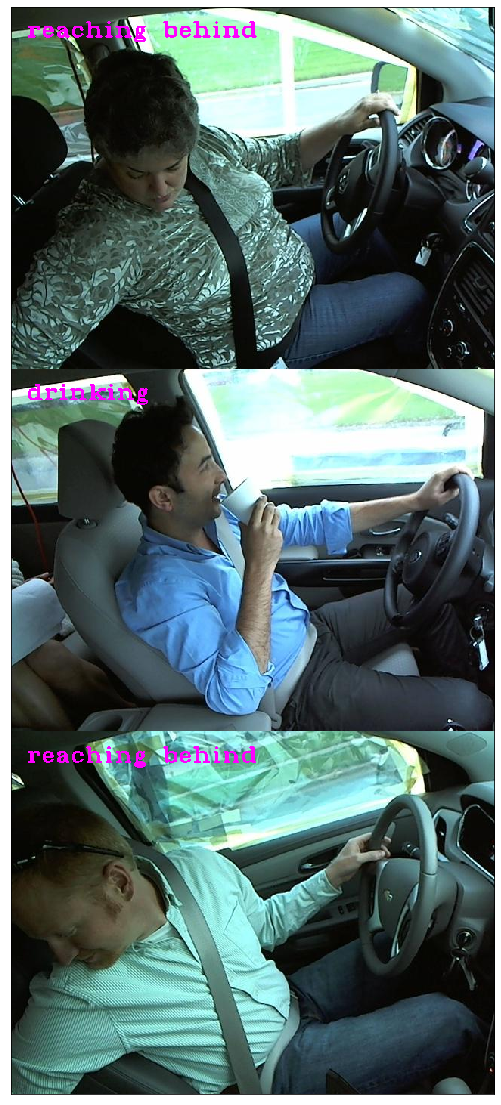

In [345]:
test_model(save=True)

#### Visualising Model Performance

Now we'll visualize the model with respective to epochs as we have save the history of model in hist_df.csv

In [328]:
hist_df = pd.read_csv('./History df.csv')

In [331]:
hist_df.head()

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy
0,0,0.194285,0.942367,0.183424,0.946241
1,1,0.188181,0.944596,0.228611,0.934196
2,2,0.189877,0.945154,0.216745,0.935311
3,3,0.181291,0.945209,0.176552,0.943118
4,4,0.189511,0.944819,0.177931,0.946241


### Plot between Train loss and Train accuracy

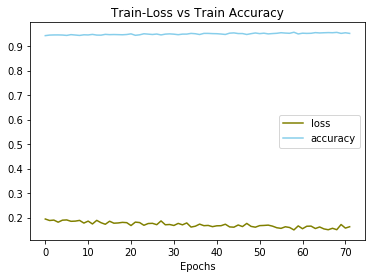

In [338]:
plt.plot("Unnamed: 0","loss",data=hist_df,color = 'olive')
plt.plot("Unnamed: 0","accuracy",data=hist_df,color = 'skyblue')
plt.title("Train-Loss vs Train Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.show()

###### Hence as the no.of epoch increases training loss is decreasing and training accuracy is increaing

### Plot between Validation loss and Validation accuracy

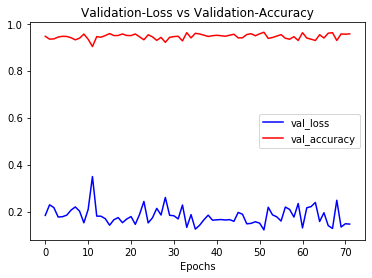

In [340]:
plt.plot("Unnamed: 0","val_loss",data=hist_df,color = 'blue')
plt.plot("Unnamed: 0","val_accuracy",data=hist_df,color = 'red')
plt.title("Validation-Loss vs Validation-Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

### Plot between Train accuracy and Validation accuracy

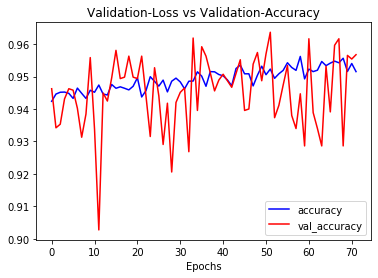

In [341]:
plt.plot("Unnamed: 0","accuracy",data=hist_df,color = 'blue')
plt.plot("Unnamed: 0","val_accuracy",data=hist_df,color = 'red')
plt.title("Validation-Loss vs Validation-Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()